# **THE SPARKS FOUNDATION**

**Task 2 : Prediction Using Supervised ML**

---

Predict the percentage of marks of an student based on the number of
study hours.

In [1]:
#Step1: Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Step2: Importing the data
my_data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
my_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Step3: Seeing the description of data for personal understanding
my_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


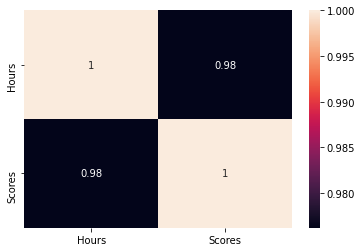

In [5]:
#Step4: 
sns.heatmap(my_data.corr(),annot=True)

It can be seen that the correlation between Hours and Scores is very high and also that there is a positive correlation between the two.



Text(0, 0.5, 'Scored Percentage')

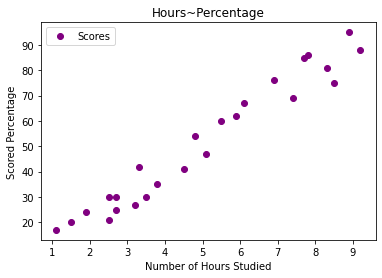

In [9]:
#Step5: Plotting the scores
my_data.plot(x='Hours',y='Scores',style='o',c='purple')
plt.title('Hours~Percentage')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Scored Percentage') 

It can be observed from the above plot that as the number of hours studied increases, the score obtained also increases. Hence they have a positive relation.

In [10]:
#Step6: Importing packages for the purpose of training and splitting data for further analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
#Step7
X=my_data.iloc[:,:-1].values
Y=my_data.iloc[:,1].values

In [13]:
#Step8: Splitting the data into 25-75% 
X_train ,X_test , Y_train ,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [15]:
#Step9:  Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

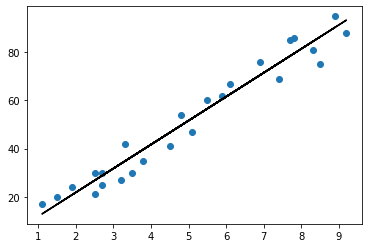

In [19]:
#Step10: Plotting the regression line
Reg_line = lin_reg.coef_*X+lin_reg.intercept_
plt.scatter(X, Y)
plt.plot(X, Reg_line,c='black');

In [23]:
#Step11: Prediction of scores
predicted_score = lin_reg.predict(X_test)
new_mydata = pd.DataFrame({'Score':Y_test,'Predicted Score':predicted_score})
new_mydata

,Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [24]:
#Step12: Prediction of score when time is 9.25 hours
hours=9.25
pred = lin_reg.predict([[hours]])
print("Predicted Score when the student studies for 9.25 hours is =",pred[0])

Predicted Score when the student studies for 9.25 hours is = 93.89272889341652


In [26]:
#Step12: Model Evaluation by finding out Mean Absolute Error, MSE AND RMSE
from sklearn import metrics
print("The Mean Absolute Error is:",metrics.mean_absolute_error(Y_test,predicted_score))
print("The Mean Squared Error is:",metrics.mean_squared_error(Y_test,predicted_score))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(Y_test,predicted_score)))

The Mean Absolute Error is: 4.130879918502482
The Mean Squared Error is: 20.33292367497996
The Root Mean Squared Error is: 4.509204328368805
